## Queue Test cases

Generated using ChatGPT

Overview
- Intialize
- Enqueue
- Dequeue
- Contains
- Performance Test: Large Queue - 100 million nodes

### Initialise

In [1]:
import sys
import os
import unittest
import time

# Get the absolute path of the parent directory (one level up)
sys.path.append(os.path.abspath(".."))

from datastructures.Queue import Queue

### Enqueue

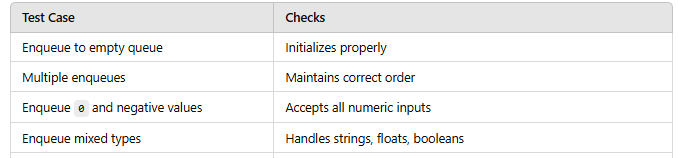

In [2]:
class TestQueueEnqueue(unittest.TestCase):

    def extract_values(self, queue: Queue) -> list:
        """Helper to extract all values from the queue without modifying it"""
        values = []
        current = queue._Queue__first  # Accessing private member for testing only
        while current:
            values.append(current.value)
            current = current.next
        return values

    def test_enqueue_single_element(self):
        """Test enqueuing a single element"""
        q = Queue()
        q.enqueue(10)
        self.assertEqual(q.length(), 1)
        self.assertEqual(q.front(), 10)
        self.assertEqual(self.extract_values(q), [10])

    def test_enqueue_multiple_elements(self):
        """Test enqueuing multiple elements"""
        q = Queue()
        q.enqueue(1)
        q.enqueue(2)
        q.enqueue(3)
        self.assertEqual(q.length(), 3)
        self.assertEqual(q.front(), 1)  # First inserted item
        self.assertEqual(self.extract_values(q), [1, 2, 3])

    def test_enqueue_negative_and_zero(self):
        """Test enqueuing 0 and negative values"""
        q = Queue()
        q.enqueue(0)
        q.enqueue(-1)
        self.assertEqual(q.length(), 2)
        self.assertEqual(self.extract_values(q), [0, -1])

    def test_enqueue_mixed_data_types(self):
        """Test enqueuing different data types"""
        q = Queue()
        q.enqueue("hello")
        q.enqueue(3.14)
        q.enqueue(True)
        self.assertEqual(q.length(), 3)
        self.assertEqual(self.extract_values(q), ["hello", 3.14, True])

# Run tests inside Jupyter Notebook
unittest.TextTestRunner().run(unittest.defaultTestLoader.loadTestsFromTestCase(TestQueueEnqueue))

....
----------------------------------------------------------------------
Ran 4 tests in 0.003s

OK


<unittest.runner.TextTestResult run=4 errors=0 failures=0>

### Dequeue

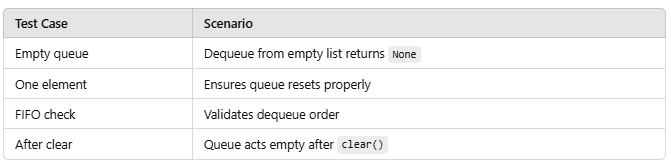

In [3]:
class TestQueueDequeue(unittest.TestCase):

    def extract_values(self, queue: Queue) -> list:
        """Helper to extract values from the queue (without dequeuing)"""
        values = []
        current = queue._Queue__first  # Accessing private for test only
        while current:
            values.append(current.value)
            current = current.next
        return values

    def test_dequeue_from_empty_queue(self):
        """Dequeue from an empty queue should return None and keep length 0"""
        q = Queue()
        self.assertIsNone(q.dequeue())
        self.assertEqual(q.length(), 0)
        self.assertEqual(self.extract_values(q), [])

    def test_dequeue_single_element(self):
        """Dequeue the only element"""
        q = Queue()
        q.enqueue(42)
        removed = q.dequeue()
        self.assertEqual(removed.value, 42)
        self.assertEqual(q.length(), 0)
        self.assertTrue(q.isEmpty())
        self.assertEqual(self.extract_values(q), [])

    def test_dequeue_multiple_elements(self):
        """Dequeue elements in correct FIFO order"""
        q = Queue()
        q.enqueue("a")
        q.enqueue("b")
        q.enqueue("c")

        removed1 = q.dequeue()
        self.assertEqual(removed1.value, "a")
        self.assertEqual(q.length(), 2)
        self.assertEqual(self.extract_values(q), ["b", "c"])

        removed2 = q.dequeue()
        self.assertEqual(removed2.value, "b")
        self.assertEqual(q.length(), 1)
        self.assertEqual(self.extract_values(q), ["c"])

        removed3 = q.dequeue()
        self.assertEqual(removed3.value, "c")
        self.assertEqual(q.length(), 0)
        self.assertTrue(q.isEmpty())
        self.assertEqual(self.extract_values(q), [])

    def test_dequeue_after_clear(self):
        """Dequeue should return None after clear() is called"""
        q = Queue()
        q.enqueue(1)
        q.enqueue(2)
        q.clear()
        self.assertIsNone(q.dequeue())
        self.assertTrue(q.isEmpty())

# Run tests inside Jupyter Notebook
unittest.TextTestRunner().run(unittest.defaultTestLoader.loadTestsFromTestCase(TestQueueDequeue))

....
----------------------------------------------------------------------
Ran 4 tests in 0.004s

OK


<unittest.runner.TextTestResult run=4 errors=0 failures=0>

### Contains

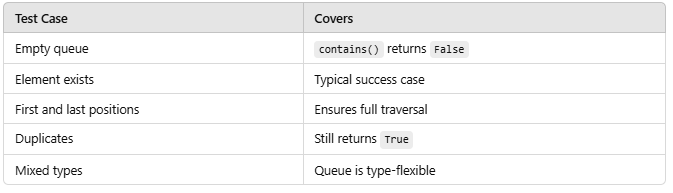

In [4]:
class TestQueueContains(unittest.TestCase):

    def extract_values(self, queue: Queue) -> list:
        """Helper to extract values from the queue (without dequeuing)"""
        values = []
        current = queue._Queue__first  # Accessing private for testing
        while current:
            values.append(current.value)
            current = current.next
        return values

    def test_contains_in_empty_queue(self):
        """Check contains() on an empty queue"""
        q = Queue()
        self.assertFalse(q.contains(10))

    def test_contains_existing_element(self):
        """Check contains() for present element"""
        q = Queue()
        q.enqueue("apple")
        q.enqueue("banana")
        q.enqueue("cherry")
        self.assertTrue(q.contains("banana"))
        self.assertFalse(q.contains("orange"))

    def test_contains_first_and_last(self):
        """Check contains() for first and last inserted elements"""
        q = Queue()
        q.enqueue("first")
        q.enqueue("middle")
        q.enqueue("last")
        self.assertTrue(q.contains("first"))
        self.assertTrue(q.contains("last"))

    def test_contains_duplicate_value(self):
        """Check contains() when duplicate values exist"""
        q = Queue()
        q.enqueue(5)
        q.enqueue(10)
        q.enqueue(5)
        self.assertTrue(q.contains(5))

    def test_contains_with_mixed_data_types(self):
        """Check contains() with various types"""
        q = Queue()
        q.enqueue(0)
        q.enqueue(None)
        q.enqueue(True)
        q.enqueue("test")
        self.assertTrue(q.contains(0))
        self.assertTrue(q.contains(None))
        self.assertTrue(q.contains(True))
        self.assertFalse(q.contains("absent"))

# Run tests inside Jupyter Notebook
unittest.TextTestRunner().run(unittest.defaultTestLoader.loadTestsFromTestCase(TestQueueContains))

.....
----------------------------------------------------------------------
Ran 5 tests in 0.003s

OK


<unittest.runner.TextTestResult run=5 errors=0 failures=0>

### Performance Test for Handling 100 Million Nodes in Stack

In [5]:
class TestQueuePerformance(unittest.TestCase):

    def test_large_queue_performance(self):
        """Performance Test: Queue with 100 million elements"""
        queue = Queue()
        num_elements = 100_000_000  # 100 million

        print(f"\n[Queue Performance Test] Enqueueing {num_elements} elements...")

        start_time = time.time()
        for i in range(num_elements):
            queue.enqueue(i)
        enqueue_time = time.time() - start_time

        self.assertEqual(queue.length(), num_elements)
        self.assertEqual(queue.front(), 0)

        print(f"Enqueue time: {enqueue_time:.2f} seconds")

        print(f"[Queue Performance Test] Dequeueing {num_elements} elements...")

        start_time = time.time()
        for _ in range(num_elements):
            queue.dequeue()
        dequeue_time = time.time() - start_time

        self.assertTrue(queue.isEmpty())
        self.assertEqual(queue.length(), 0)
        
        print(f"Dequeue time: {dequeue_time:.2f} seconds")
        print(f"[Queue Performance Test Completed ✅]")

unittest.TextTestRunner().run(unittest.defaultTestLoader.loadTestsFromTestCase(TestQueuePerformance))


[Queue Performance Test] Enqueueing 100000000 elements...
Enqueue time: 63.78 seconds
[Queue Performance Test] Dequeueing 100000000 elements...


.
----------------------------------------------------------------------
Ran 1 test in 92.331s

OK


Dequeue time: 28.55 seconds
[Queue Performance Test Completed ✅]


<unittest.runner.TextTestResult run=1 errors=0 failures=0>